### Tutorial for creating Example animation 1 with FieldVis

Author: Nathanyel Schut<br>
Date: 12-06-2022

In [37]:
from fieldvis import et_reader, field_dp, field_plot
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

Paths to data, adjust these to where they are stored on your computer

In [38]:
data_path = r"C:\Users\lolha\Documents\Bachelor project\data"
save_path = r"C:\Users\lolha\Documents\Bachelor project\Example Animation 2"

Getting lists of the full filenames

In [40]:
it_list, files_B = field_dp.find_iterations('Bvec', data_path, return_files=True)
_, files_bernoulli = field_dp.find_iterations('bernoulli', data_path, return_files=True)

print('Iterations:', it_list, '\n')
print('Magnetic field files:', files_B, '\n')
print('Bernoulli criterion files:', files_bernoulli, '\n')

Iterations: [79872] 

Bernoulli criterion files: ['C:\\Users\\lolha\\Documents\\Bachelor project\\Visualization-of-binary-neutron-star-merger-simulations-main\\data\\rho2.xyz_it=79872.h5'] 



Creating the data readers

In [52]:
rl = 1

def data_reader_B(index):
    return et_reader.ET_to_numpy(rl, files_B[index*3:(index*3 + 3)])

def data_reader_bernoulli(index):
    file_name = files_bernoulli[index]
    file = h5py.File(file_name)
    data = np.array(file['bernoulli_v3d1'])
    
    return [data]

Bvec_data = data_reader_B(2)
print('Shape of the Bvec reader output:', np.shape(Bvec_data))
print('Type of a component of the vector data:', type(Bvec_data[0]))

<KeysViewHDF5 ['HYDROBASE::rho it=79872 tl=0 rl=0 c=0', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=10', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=100', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1000', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1001', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1002', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1003', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1004', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1005', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1006', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1007', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1008', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1009', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=101', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1010', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1011', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1012', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1013', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1014', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1015', 'HYDROBASE::rho it=79872 tl=0 rl=0 c=1016', 'HYDROBASE::rho it=79872 tl

Getting grid information

In [42]:
file = h5py.File(files_B[2])
var_name, it, tl, rl_list, c_list = et_reader.ET_file_parser(file)
delta, ghostzones, dimensions, min_coords, max_coords = et_reader.ET_get_grid_info(var_name, it, tl, rl, c_list, file)

print('Variable name:', var_name)
print('Iteration:', it)
print('Reference levels:', rl_list)
print('Grid spacings:', delta)
print('Ghostzones:', ghostzones)
print('x-range:', round(min_coords[0], 2), round(max_coords[0], 2))
print('y-range:', round(min_coords[1], 2), round(max_coords[1], 2))
print('z-range:', round(min_coords[2], 2), round(max_coords[2], 2))

Variable name: HYDROBASE::rho
Iteration: 79872
Reference levels: [0, 1, 2, 3, 4]
Grid spacings: [1.2 1.2 1.2]
Ghostzones: [3 3 3]
x-range: -138.0 139.2
y-range: -138.0 139.2
z-range: 0.0 139.2


Other plot settings, such as opacity and camera position

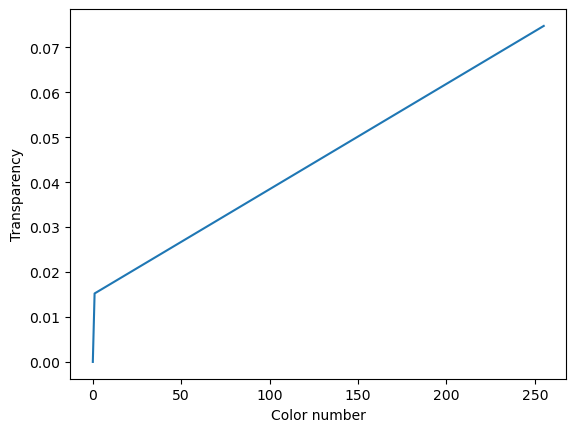

In [43]:
linear = lambda x, a, b: a*x + b

opacity = linear(np.arange(0, 256, 1), 0.06, 0.015*256)

# Filter out all data outside the data range provided
opacity[0] = 0

# Camera position, focal point and up vector
cpos = [(245.23096320064798, 840.741228880382, -315.03912073198734),
(-6.211109756869366, 11.909251907227983, 35.24184501603246),
(-0.11027435252567375, -0.358338604566275, -0.9270560995174663)]

plt.plot(opacity/256);
plt.ylabel('Transparency');
plt.xlabel('Color number');

Dictionaries with plot settings

In [44]:
kwargs = {
    'window_size': [600, 1000],
    'position': cpos[0],
    'focal_point': cpos[1],
    'up': cpos[2],
    'background_color': 'k',
    'off_screen': True,
    'screenshot': 'test.png',
    'show_grid': False,
    'return_cpos': True,
    'notebook': True
}

bernoulli_kwargs = {
    'spacing': delta,
    'origin': [-138, -138, 0.0],
    'cmap': 'Reds',
    'log_scale': False,
    'clim': [1.02, 3],
    'mapper': 'gpu',
    'scalar_bar_args': {'use_opacity': False, 'color':'w'},
    'opacity': opacity,
    'n_colors': 256,
    'shade': True,
    'name': 'Bernoulli criterion',
    'diffuse': 1,
    'mirror_z': True
}

field_line_kwargs = {
    'spacing': delta,
    'origin': [-138, -138, 0.0],
    'source_center': [0, 0, 0],
    'n_points': 30,
    'radius': 0.7,
    'source_radius': 9,
    'color': 'w',
    'mirror_z': False,
    'return_source': True
}

Creating the plot

In [45]:
bernoulli_data = data_reader_bernoulli(0)
Bvec_data = data_reader_B(0)

bernoulli, remaining_ber_kwargs = field_dp.get_plot_object(bernoulli_data, **bernoulli_kwargs.copy())
Bvec, src, remaining_Bvec_kwargs = field_dp.get_plot_object(Bvec_data, **field_line_kwargs.copy())

field_plot.plotter([Bvec, bernoulli], [remaining_Bvec_kwargs, remaining_ber_kwargs], plotter_settings=kwargs)

KeyError: "Unable to open object (object 'rho' doesn't exist)"

Creating the animation

In [ ]:
kwargs['notebook'] = False
kwargs['window_size'] = [1200, 2000]

field_plot.animator([data_reader_bernoulli, data_reader_B], [bernoulli_kwargs, field_line_kwargs], save_path=save_path, n_datasets=len(it_list), n_processes=4, **kwargs)